In [17]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


In [3]:
# Load the Iris dataset
iris = sns.load_dataset('iris')

# Select the features for Q-Q plots (sepal_length, sepal_width, petal_length, petal_width)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

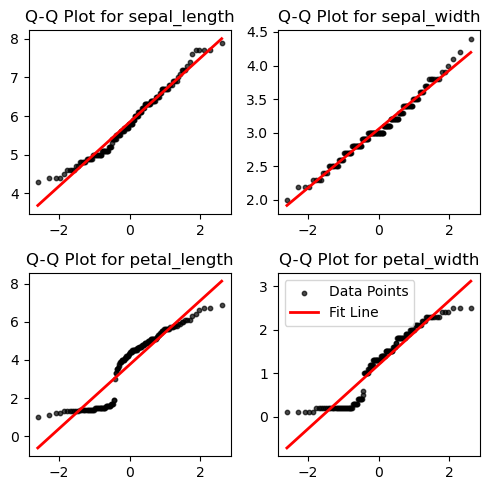

In [11]:


# Create a figure for multiple subplots
plt.figure(figsize=(5, 5))

# Loop through each feature to create customized Q-Q plots
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    # Get the Q-Q plot data (quantiles and ordered values)
    (quantiles, values), (slope, intercept, r) = stats.probplot(iris[feature], dist="norm")
    
    # Customize the scatter plot (Q-Q points)
    plt.scatter(quantiles, values, color='black', s=10, alpha=0.7, label='Data Points')  # s=20 for smaller points
    
    # Plot the theoretical line (normal distribution line)
    plt.plot(quantiles, slope * quantiles + intercept, color='red', lw=2, label='Fit Line')
    
    plt.title(f'Q-Q Plot for {feature}')

plt.legend()
# Show the customized Q-Q plots
plt.tight_layout()
plt.show()

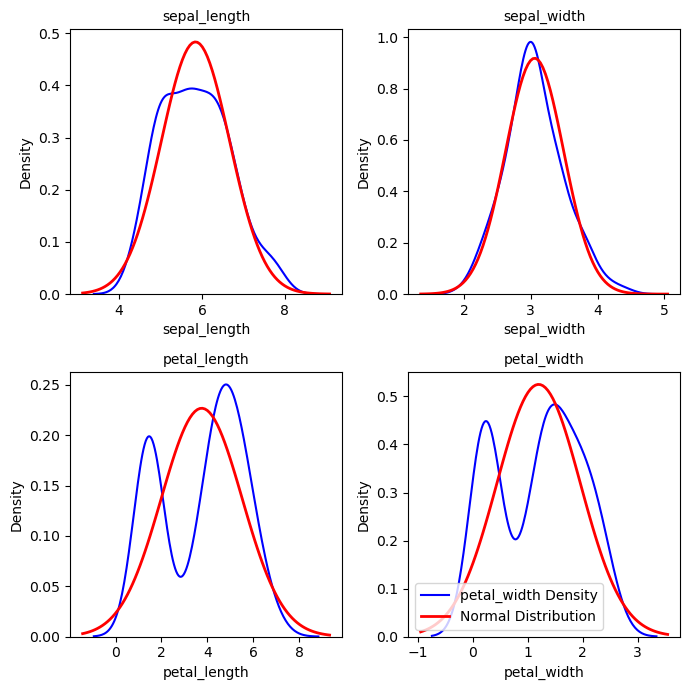

In [13]:
# Create a figure for multiple subplots
plt.figure(figsize=(7, 7))

# Loop through each feature to create density plots with normal distribution overlay
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    
    # Plot the density plot of the feature
    sns.kdeplot(iris[feature], color='blue', label=f'{feature} Density')
    
    # Overlay the normal distribution
    data = iris[feature]
    mu, std = np.mean(data), np.std(data)  # Calculate mean and standard deviation
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'r-', lw=2, label='Normal Distribution')
    
    plt.title(f'{feature}',size=10)

plt.legend()
# Show the density plots
plt.tight_layout()
plt.show()

In [19]:
# Function to compute theoretical quantiles for a Q-Q plot
def compute_qq_quantiles(data):
    # Step 1: Sort the observed data
    sorted_data = np.sort(data)
    
    # Step 2: Generate uniform quantiles (percentiles) for the data
    uniform_quantiles = np.linspace(1e-6, 1 - 1e-6, len(sorted_data))
   
    
    # Step 3: Calculate the corresponding normal quantiles (theoretical values)
    theoretical_quantiles = norm.ppf(uniform_quantiles)
    
    # Return the sorted observed data (empirical quantiles) and the theoretical quantiles
    return theoretical_quantiles, sorted_data

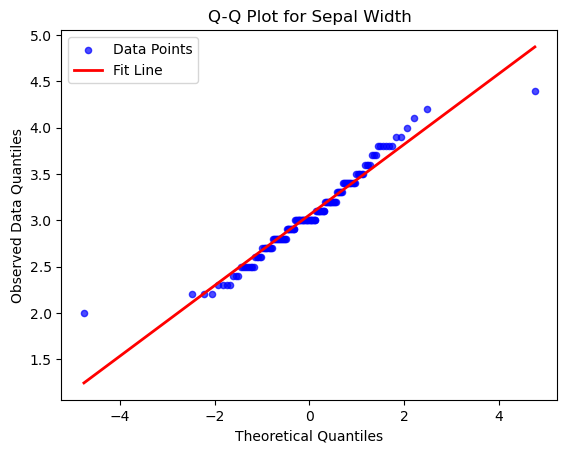

In [20]:
theoretical_quantiles, sorted_data = compute_qq_quantiles(iris['sepal_width'])

# Plotting outside the function
plt.scatter(theoretical_quantiles, sorted_data, color='blue', s=20, alpha=0.7, label='Data Points')

# Fit a line to the theoretical vs. observed data
slope, intercept = np.polyfit(theoretical_quantiles, sorted_data, 1)
plt.plot(theoretical_quantiles, slope * theoretical_quantiles + intercept, color='red', lw=2, label='Fit Line')

# Add labels and legend
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Data Quantiles')
plt.title('Q-Q Plot for Sepal Width')
plt.legend()

plt.show()

In [22]:
data = iris['sepal_width']
data

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [23]:
sorted_data = np.sort(data)
sorted_data

array([2. , 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.7, 2.7,
       2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9,
       2.9, 2.9, 2.9, 2.9, 2.9, 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1,
       3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2,
       3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4,
       3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5,
       3.5, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.8, 3.8,
       3.8, 3.9, 3.9, 4. , 4.1, 4.2, 4.4])

In [24]:
# Step 2: Generate uniform quantiles (percentiles) for the data
uniform_quantiles = np.linspace(1e-6, 1 - 1e-6, len(sorted_data))
uniform_quantiles

array([1.00000000e-06, 6.71239597e-03, 1.34237919e-02, 2.01351879e-02,
       2.68465839e-02, 3.35579799e-02, 4.02693758e-02, 4.69807718e-02,
       5.36921678e-02, 6.04035638e-02, 6.71149597e-02, 7.38263557e-02,
       8.05377517e-02, 8.72491477e-02, 9.39605436e-02, 1.00671940e-01,
       1.07383336e-01, 1.14094732e-01, 1.20806128e-01, 1.27517523e-01,
       1.34228919e-01, 1.40940315e-01, 1.47651711e-01, 1.54363107e-01,
       1.61074503e-01, 1.67785899e-01, 1.74497295e-01, 1.81208691e-01,
       1.87920087e-01, 1.94631483e-01, 2.01342879e-01, 2.08054275e-01,
       2.14765671e-01, 2.21477067e-01, 2.28188463e-01, 2.34899859e-01,
       2.41611255e-01, 2.48322651e-01, 2.55034047e-01, 2.61745443e-01,
       2.68456839e-01, 2.75168235e-01, 2.81879631e-01, 2.88591027e-01,
       2.95302423e-01, 3.02013819e-01, 3.08725215e-01, 3.15436611e-01,
       3.22148007e-01, 3.28859403e-01, 3.35570799e-01, 3.42282195e-01,
       3.48993591e-01, 3.55704987e-01, 3.62416383e-01, 3.69127779e-01,
      

In [ ]:
# Step 3: Calculate the corresponding normal quantiles (theoretical values)
theoretical_quantiles = norm.ppf(uniform_quantiles)

In [29]:
data = [1.2, 2.1, 3.3, 4.1, 7.1]
sorted_data = np.sort(data)
sorted_data

array([1.2, 2.1, 3.3, 4.1, 7.1])

In [30]:
uniform_quantiles = np.linspace(0.05, 0.95, len(sorted_data))
print(uniform_quantiles)

[0.05  0.275 0.5   0.725 0.95 ]


In [31]:
theoretical_quantiles = norm.ppf(uniform_quantiles)
print(theoretical_quantiles)

[-1.64485363e+00 -5.97760126e-01 -1.39145821e-16  5.97760126e-01
  1.64485363e+00]


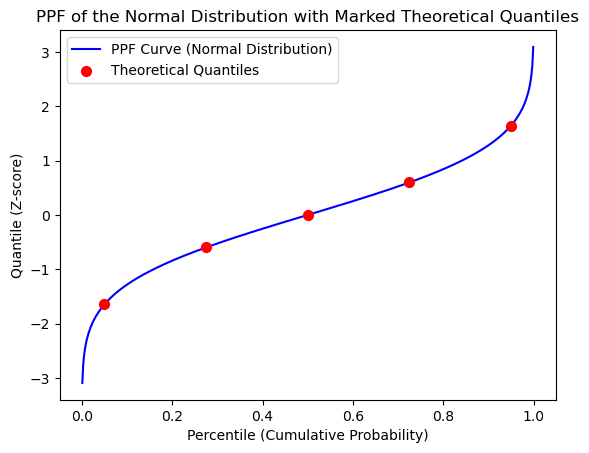

In [37]:
# Plot the PPF curve (standard normal distribution)
x = np.linspace(0.001, 0.999, 500)  # Create a range of probabilities
ppf_values = norm.ppf(x)  # PPF of the normal distribution

plt.plot(x, ppf_values, label='PPF Curve (Normal Distribution)', color='blue')

# Mark the theoretical quantiles from the Q-Q plot
plt.scatter(uniform_quantiles, theoretical_quantiles, color='red', s=50, zorder=5, label='Theoretical Quantiles')

# Add labels and title
plt.xlabel('Percentile (Cumulative Probability)')
plt.ylabel('Quantile (Z-score)')
plt.title('PPF of the Normal Distribution with Marked Theoretical Quantiles')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [38]:
slope, intercept = np.polyfit(theoretical_quantiles, sorted_data, 1)
fit_values = slope * theoretical_quantiles + intercept
fit_values

array([0.6331345 , 2.49634092, 3.56      , 4.62365908, 6.4868655 ])

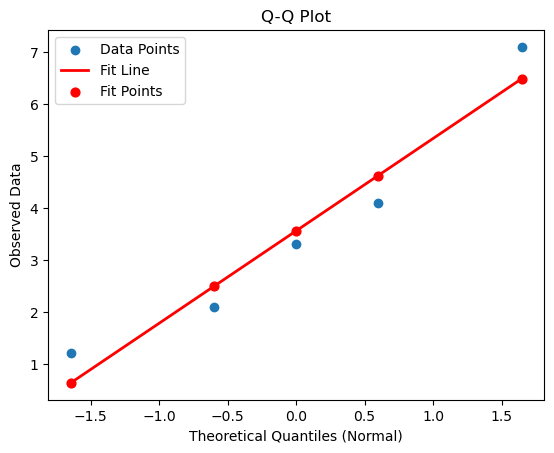

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of theoretical quantiles vs sorted observed data
plt.scatter(theoretical_quantiles, sorted_data, label="Data Points")

# Fit a line using polyfit (least squares)

# Plot the fit line using the same slope and intercept
plt.plot(theoretical_quantiles, fit_values, color='red', lw=2, label="Fit Line")

# Plot the fit line as red points (for comparison)
plt.scatter(theoretical_quantiles, fit_values, color='red', s=40, label='Fit Points')

# Add labels and title
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Observed Data')
plt.title('Q-Q Plot')
plt.legend()
plt.show()